## INFO
Editor:Shaoe.chen(Marty.chen)

## Convolution

CNN由三巨頭之一的Yann LeCun(楊立昆)創並且提出了LeNet卷積架構，CNN並非只能應用於2D的影像，1D如時間序列數據或3D如超音波影像亦可處理，在神經網路中，卷積這個行為是一個input與kernel(filter)加權來得到一個output(map\_映射)。  
註：後面以filter來稱呼kernel

卷積：   
下圖所表示的是一個卷積的行為，filter(2x2x1)與2D(4x5x1)資料做一次計算，再依設置的stride(範例為1，若為2則一次像右移動兩格)向右滑動，由左至右，由上而下的計算覆蓋區域與filter的各別元素乘積加總。
<img src="./images/conv1.gif" style="width:400;height:100;">

由上圖的執行也可以發現，四個角的部份在卷積過程中都只計算一次，邊緣部份也只得少數計算，這可能會造成邊緣資訊的提供不足，也因此有了另一個超參數padding的設置，透過padding的設置將圖片外推出去，以此方式讓邊緣資訊也可以有效提供神經網路，常聽到same padding所指即卷積過後其圖片大小不變。  

padding：  
<img src="./images/conv2.jpg" style="width:200;height:200;">  
上圖可以看到，透過padding將圖片外推，最左上角的a不再只計算一次，而是四次(如果沒算錯的話)，這讓邊緣資訊可以有效提供給予神經網路。

stride：
<img src="./images/conv2.gif" style="width:200;height:200;">  
上圖為stride設置為2的移動狀況

filter：  
圖片一般來說有rgb三個通道(channel)，二值化或灰值之後就不會有3個channel，上例來看，輸入是4x5，那filter就只會是fxf(2x2)，如果輸入是彩色照片4x5x3(rgb)，那filter就會是2x2x3，filter的channel與上層輸入必需相同，輸出則依filter數量產生不同channel輸出，上例來看，如果filter設置有10個，那輸出照片即為3x4x10(channel)。所以，filter需要設置每次卷積的尺寸f與數量channel。

filter的設置主要在於不同的filter可以學習到不同的邊緣檢測，愈前面的神經網路所學到的愈細節，這是一個很重要的觀念，這關係到transfer learning為什麼可以在拿掉最後的sofrmax，然後重新訓練最後一層的權重之後就可以拿來給我們應用(相同領域下效果較佳)，因為細節在前面的filter都已經學習到了，可能你只需要再重新訓練後面幾層的權重之後就可以讓你的模型效能有不錯的取得。

註一：『卷積』一詞為一種數學上特殊的線性計算，而應用於神經網路中的卷積與其它領域的卷積其定義不一定相同。(參考：深度學習deep_learning)

上面我們已經有了卷積的基本觀念，用這個觀念我們可以計算出卷積之後的尺寸，在神經網路的實作中，維度的確認是非常重要的一個觀念，雖然透過framework(tensorflow,keras,pytorch,cntk...)沒有這個煩惱，但有了理論基礎在未來實作模型的時候遇到錯誤也比較能夠快速debug。  
輸出=(輸入 + 2\*padding - filter) / s + 1  

舉例：  
* 輸入
    * 39x39x3  
* conv
    * filter
        * 3x3
        * 10
    * padding
        * 0
    * stride
        * 1
* 輸出
    * (39 + 2\*0 - 3 ) / 1 + 1 = 37
    * 37x37x10

## Pooling

在實作CNN的時候，伴隨在convolution後面的總是pooling，pooling的主要用途除了縮減尺寸(實作上也會執行same padding)，直觀來看也可以當成一個特徵提取的行為，觀念上與卷積雷同，最大差異在於pooling並沒有學習參數的問題，單純的計算。

實作上較常見的兩種pooling方式為max pooling與average pooling，如下兩圖可見差異：  
max pooling：
<img src="./images/pooling1.gif" style="width:200;height:200;">  

average pooling：
<img src="./images/pooling2.gif" style="width:200;height:200;">  

max pooling會取區域內最大值，而average pooling則取區域內平均值，這兩者之間較常見為max pooling，相同於convolution，也需要設置filter(並非指convloution kernel)、stride與padding(實務上較少)。

我們利用上面的範例，接續著執行pooling  
* 輸入
    * 39x39x3  
* conv
    * filter
        * 3x3
        * 10
    * padding
        * 0
    * stride
        * 1
* 輸出
    * (39 + 2\*0 - 3 ) / 1 + 1 = 37
    * 37x37x10
* pooling
    * filter
        * 3x3
    * stride
        * 2
    * padding
        * 0
* 輸出
    * (37 - 3) / 2 + 1 = 18
    * 18x18x10
    
在執行pooling之後可以發現，輸出的尺寸幾乎減半了，也注意到，這邊的filter單純指遮罩尺寸，而非convolution kernel，印象中實作pooling的時候是以迴圈來執行每一個維度的pooling計算，上例來看，因為conv之後是37x37x10，故會迴圈執行10次。

## Summary

為什麼我們需要利用卷積來計算?直觀來看利用卷積有兩個原因，『權值(參數)共享』與『稀疏連結』，共享的部份可以由一個filter將一個3x3x3計算成一個pixel來理解，卷積透過filter這個學習參數的集合體來計算。稀疏連結則在於這輸出的pixel只跟它相對應的pixel有關，標準神經網路(DNN)中，每一個unit都跟上、下層神經網路的hidden unit相連結，但這情況在CNN中並沒有發生。  

稀疏連結：
<img src="./images/conv4.jpg" style="width:200;height:200;">   
上圖我們可以看的出，輸入點19僅跟輸出16、17有關聯。
<img src="./images/conv3.jpg" style="width:200;height:200;">   
上圖我們可以看的出，輸出20僅與14、15、19、20有關聯。

透過卷積的計算，還可利用可視化的方式來觀察每個filter學習到細節各自為何，執行卷積較為快速的方式就是直接取用已經預訓練好的模型來做transfer learning，這可以減少很多自行建模摸索的時間，對企業導入是一個很好的方向，但是transfter learning對於應用在不同領域的資料集上可能需要做更多的重新訓練，這部份需依實際狀況來調整。  

最後，很多CNN的經典架構，如LeNet、AlexNet、VGG、Inception...等，如果有興趣都可以查詢相關論文了解，這是一個了解CNN的不錯方式，提供一個網站[SnailTyan](http://noahsnail.com/2017/07/18/2017-7-18-AlexNet%E8%AE%BA%E6%96%87%E7%BF%BB%E8%AF%91%E2%80%94%E2%80%94%E4%B8%AD%E6%96%87%E7%89%88/)，上面作者有做了很多論文的翻譯以及中英文對照。  

這只是一個初淺的說明，動手去實作就會有更深刻的體驗。  
Mr.Shaoe

## 範例
上面我們了解了CNN的基本概念，預計利用CNN來做手寫辨識的範例，以此了解跟DNN所實作的模型效能差異性。

在傳統神經網路(MLP)中，我們在訓練模型之前會先將圖片轉置為n維向量，但是在CNN中是不需要的，以mnist為例，它是28x28的一個二值化圖片，在MLP的時候我們會將它轉為28\x28=784的向量(784, m)，在CNN中，我們會直接以原維度下去訓練。  

先import需求套件，並且載入模型，本機內如果沒有資料集的話會從網路直接下載，不用擔心。

In [1]:
#  載入需求套件
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.optimizers import SGD
import numpy as np
import pandas as pd

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#  載入資料集
(X_train_original, y_train_original), (X_test_original, y_test_original) = mnist.load_data()

資料集載入之後，首要即為確認資料維度，可以確認訓練集有60000，照片維度為28x28，而測試資料集有10000。

In [3]:
print('train_data_dimension:', X_train_original.shape)
print('train_data:', X_train_original.shape[0])
print('train_label_dimension:', y_train_original.shape)
print('test_data:', X_test_original.shape[0])
print('test_label_dimension:', y_test_original.shape)

train_data_dimension: (60000, 28, 28)
train_data: 60000
train_label_dimension: (60000,)
test_data: 10000
test_label_dimension: (10000,)


確認維度之後，我們要開始執行資料的前置預處理，主要有三：
1. 維度的調整，照片本身為28x28，預計將它調整為28x28x1，這可利用`np.reshape`來達成
2. 調整之後的資料統一/255做標準化，將資料縮放至0-1之間
3. lable的調整，預計輸出10個類別(0-9)，要將類別轉為one-hot來表示，keras內置工具'np_utils.to_categorical'可協助。

在CNN中，究竟是pixel x pixel x channel還是channel x pixel x pixel並沒有一個定論，如果你的bacnend為theano，那就必需以後者為主，如果是tensorflow那就以前者為主。

In [4]:
#  資料標準化
X_train_norm = X_train_original / 255
X_test_norm = X_test_original / 255

#  資料維度調整
X_train = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], X_train_norm.shape[2], 1))
X_test = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], X_test_norm.shape[2], 1))

#  lable執行one-hot encoder
#  參數10代表轉為10個類別
y_train = np_utils.to_categorical(y_train_original, 10)
y_test = np_utils.to_categorical(y_test_original, 10)

調整之後，記得再次的確認目前的資料維度

In [6]:
print('train_data_dimension:', X_train.shape)
print('test_data_dimension:', X_test.shape)
print('train_label_dimension:', y_train.shape)
print('test_label_dimension:', y_test.shape)

train_data_dimension: (60000, 28, 28, 1)
test_data_dimension: (10000, 28, 28, 1)
train_label_dimension: (60000, 10)
test_label_dimension: (10000, 10)


前置預處理對於於DNN還需要平整化是相對簡單，接下來就可以開始組裝模型，keras的開發之初即是希望從業人員可以專注意模型的建立，而不是程式的編寫。

預計利用keras來實作LeNet-5做手寫辨識，用著我們從Yann LeCun身上學習到的知識來建置他所開發的模型。

LeNet-5的『5』所指為5層，一般來說有權重參數的才會算是一層，故pooling不算，兩層conv，三層fully connect，共計五層。    


[LeNet](http://yann.lecun.com/exdb/lenet/)  
網站上有著各層提取特徵的可視化

In [8]:
model = Sequential()

#  只有輸入層的部份需要定義input_shape，後續的維度由framework自行展開
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='valid', 
                input_shape=(28,28,1), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='valid',
                 activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))

#  到這邊，經過兩次pooling已經是變成4x4x16(channel)的大小
#  透過Flatten平整之後變成4*4*16=256維的向量
model.add(Flatten())
#  Flatten之後接上fully connect
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
#  最後是輸出層，因為有10個類別，所以使用sofrmax，並記得neural unit設置為10
model.add(Dense(10, activation='softmax'))

架構好模型之後，要定義最佳化的方式，這可利用`keras.model.compile`來設置。

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

可以開始訓練模型了，利用`keras.model.fit`，並設置batch_size與Epochs，訓練期間我們也拆分了20%的資料集做驗證使用。

In [11]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 29s 601us/step - loss: 0.1509 - acc: 0.9550 - val_loss: 0.1099 - val_acc: 0.9687
Epoch 2/20
48000/48000 [==============================] - 29s 605us/step - loss: 0.1036 - acc: 0.9687 - val_loss: 0.0925 - val_acc: 0.9713
Epoch 3/20
48000/48000 [==============================] - 28s 591us/step - loss: 0.0894 - acc: 0.9723 - val_loss: 0.0842 - val_acc: 0.9738
Epoch 4/20
48000/48000 [==============================] - 29s 602us/step - loss: 0.0764 - acc: 0.9763 - val_loss: 0.0785 - val_acc: 0.9766
Epoch 5/20
48000/48000 [==============================] - 28s 592us/step - loss: 0.0610 - acc: 0.9813 - val_loss: 0.0658 - val_acc: 0.9799
Epoch 6/20
48000/48000 [==============================] - 29s 603us/step - loss: 0.0625 - acc: 0.9805 - val_loss: 0.0687 - val_acc: 0.9786
Epoch 7/20
48000/48000 [==============================] - 29s 608us/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.

下面我們利用圖面來確認模型狀況，請先執行最下方的function，詳見function說明。  
看的出來模型本身存在著overfitting的問題，但cost function是有確實的收斂。

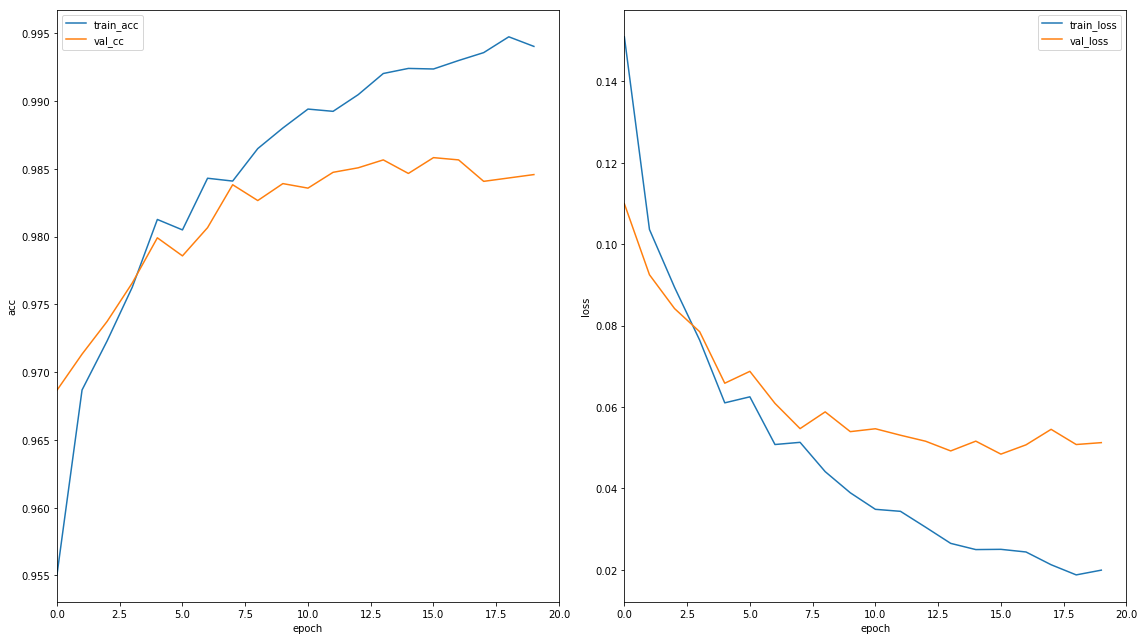

In [19]:
model_history_plot(history=history.history, epoch=history.epoch)

訓練完畢之後就可以確認模型性能狀況，請先執行最下面的function，相關功能如function說明。

In [13]:
#  請先執行最下面的function
ds_predict = utils_predict(model, {'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test})

10000/10000 [==============================] - 4s 388us/step


In [15]:
print('train_score:', ds_predict['train_score'])
print('tes_score:', ds_predict['test_score'])

train_score: 0.9923833333333333
tes_score: 0.9832


透過混肴矩陣可以清楚的看出模型中true label與predict label的相關性，這可利用`pandas.crosstab`來達成，相關的predict label我們記錄在稍早所執行的function所回傳的ds_predict中。

In [23]:
pd.crosstab(y_test_original, ds_predict['test_predict'], rownames=['test_label'], colnames=['predict_label'])

predict_label,0,1,2,3,4,5,6,7,8,9
test_label,,,,,,,,,,
0,973,1,1,0,0,0,3,2,0,0
1,0,1125,1,3,0,0,4,0,2,0
2,1,1,1023,0,2,0,0,1,3,1
3,0,0,3,997,0,5,0,0,0,5
4,0,0,0,0,971,0,4,0,1,6
5,1,0,1,3,0,881,3,1,1,1
6,2,2,0,0,4,4,945,0,1,0
7,1,3,14,6,2,2,0,990,2,8
8,3,1,4,3,0,1,1,4,955,2


最後，我們可以利用遮罩來單純的檢視判斷錯誤的部份，這有利於調整模型，以此判斷究竟是資料集本身的問題還是模型的問題，該如何調整overfitting..等問題。

執行之前請記得先執行最下面的function

In [25]:
#  先設置遮罩
mask_train = y_train_original != ds_predict['train_predict']
mask_test = y_test_original != ds_predict['test_predict']

In [26]:
#  確認錯誤筆數
print('train_error_count:', y_train_original[mask_train].shape[0])
print('test_error_count:', y_test_original[mask_test].shape[0])

train_error_count: 457
test_error_count: 168


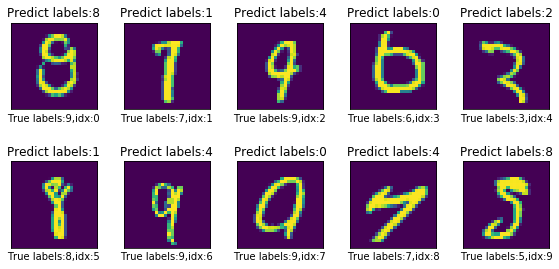

In [36]:
plt_image(X_train_original[mask_train], y_train_original[mask_train], predict_labels=ds_predict['train_predict'][mask_train],
          idx_start=0, idx_batch_size=10, fig_size='small')

以下為自己寫的function，請先執行。

In [12]:
def utils_predict(model, datasets, evaluate=True, need_prob=False):
    """
    keras預測之後回傳為概率，透過此function可轉為類別
    再依需求調控是否回傳概率與模型效能評估
    
    model:keras.model，訓練之後的模型
    datasets:資料集，格式為dict，索引名稱必需為X_train, X_test, y_train, y_test
        datasets:
            'X_train':train_dataset
            'X_test':test_dataset
            'y_train':train_label
            'y_test':test_label
    evaluate:是否執行model.evaluate，如果是，那資料集就必需有y_train與y_test
    need_prob:是否回傳概率
    
    return datasets
        預測類別：
            train_predict, test_predict
        預測概率：
            train_predict_prob, test_predict_prob
        模型評估：
            train_score, test_score
        
    datasets:dict    
    """
    train_dataset = datasets['X_train']
    test_dataset = datasets['X_test']
    
    train_prob = model.predict(train_dataset, verbose=1)
    test_prob = model.predict(test_dataset, verbose=1)
    
    train_labels = train_prob.argmax(axis=-1)
    test_labels = test_prob.argmax(axis=-1)
    
    datasets['train_predict'] = train_labels
    datasets['test_predict'] = test_labels
    
    if evaluate:
        scores_train = model.evaluate(X_train, y_train)
        scores_test = model.evaluate(X_test, y_test)
        datasets['train_score'] = scores_train[1]
        datasets['test_score'] = scores_test[1]
        
    if need_prob:
        datasets['train_predict_prob'] = train_prob
        datasets['test_predict_prob'] = test_prob
        
    
    return datasets

In [18]:
#  產生圖面(acc，val)
import matplotlib.pyplot as plt
def model_history_plot(history, epoch):
    """
    history:訓練記錄，為keras.History.history
    epoch:迭代次數，為keras.History.epoch
    
    首先判斷物件長度是否為4，如果是那代表有啟用驗證資料集，若為2，就代表只有訓練資料集。
    """
    #  用以判斷是否有驗證資料集，如果dict長度為4則賦值為True
    val = False
    
    if len(history)==4:
        val = True
        val_acc = history['val_acc']
        val_loss = history['val_loss']
        
    acc = history['acc']
    loss = history['loss']
       
    #  設置圖表
    plt.figure(figsize=(16,9))
    
    #  準確度_acc
    plt.subplot(121)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.xlim(min(epoch), max(epoch)+1)
    plt.plot(epoch, acc, label='train_acc')
    
    if val:
        plt.plot(epoch, val_acc, label='val_cc')
    plt.legend(loc='best')
    
    #  訓練成本_loss
    plt.subplot(122)    
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim(min(epoch), max(epoch)+1)
    plt.plot(epoch, loss, label='train_loss')
    
    if val:
        plt.plot(epoch, val_loss, label='val_loss')            
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

In [32]:
import math

def plt_image(images, labels, predict_labels=[], idx_start=0, idx_batch_size=10, cel_num=5, fig_size='big'):
    """
    images:來源照片(x)
    labels：來源照片類別(y)
    predict_labels:預測照片類別
    idx_start:起始索引
        預設為0
    idx_batch_size:每次讀取量
        預設為10
    cel_num:每row顯示幾張照片
        預設為5
    fig_size:figure.figsize設置
        big:16,9
        middle:12,7
        small:8,4
        
    當每次讀取批量>20的時候會以20取值
    如果照片想要大點來看，就必需將cel_num設置小一點，然後設置size為big或是middle
    """
    #  判斷索引值是否超過10，若超過20則idx_batch_size重新賦值
    if idx_batch_size > 20:
        idx_batch_size = 20   
    
    rows = int(math.ceil(idx_batch_size / cel_num))
    
    if fig_size=='big':
        _size=(16, 9)
    elif fig_size=='middle':
        _size=(12, 7)
    elif fig_size=='small':
        _size=(8, 4)
        
    #  設置圖表尺寸
    plt.figure(figsize=(_size))
    for i in range(idx_batch_size): 
        ax = plt.subplot(rows,cel_num,i+1)
        #  取消x、y軸的刻度
        plt.xticks(())        
        plt.yticks(())
        #  設置x軸的label為
        ax.set_xlabel('True labels:' + str(labels[idx_start]) + ',idx:' + str(idx_start))
        #  如果predict_labls不是空值，那就帶入資料
        if len(predict_labels)>0:            
            ax.set_title('Predict labels:' + str(predict_labels[idx_start]))
        ax.imshow(images[idx_start])
        #  換下一筆
        idx_start += 1        
         
    #  確保資料呈現正常    
    plt.tight_layout()    
    plt.show()        